In [ ]:
#import all necessary libraries and initial setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold
import math

#To render figures in notebook
%matplotlib inline 

In [ ]:
mushroom_data = pd.read_csv('raw.csv')  
mushroom_data.head(n = 5)   #Print first five rows of dataframe in formatted style 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
#Begin Analysis of DataFrame

#For all columns, it details no of non-null values, no of unique values, value with max frequency, frequency of value with max count

mushroom_data.describe() 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
for i in mushroom_data.columns:
    mushroom_data[i] = mushroom_data[i].astype('category')
    print(mushroom_data[i].value_counts())
    print('-'*40)

e    4208
p    3916
Name: class, dtype: int64
----------------------------------------
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
----------------------------------------
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
----------------------------------------
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
----------------------------------------
f    4748
t    3376
Name: bruises, dtype: int64
----------------------------------------
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
----------------------------------------
f    7914
a     210
Name: gill-attachment, dtype: int64
----------------------------------------
c    6812
w    1312
Name: gill-spacing, dtype: int64
----------------------------------------
b    5612
n    2512
Name: gill-size, dtype: int64
------------

In [ ]:
#Some observations :
#1. stalk-root has a suspious category '?' for 2480 rows, which may be an outlier/missing data and corrupt the classification
#2. viel-type just has one categorical data which will not help in classification

AttributeError: ignored

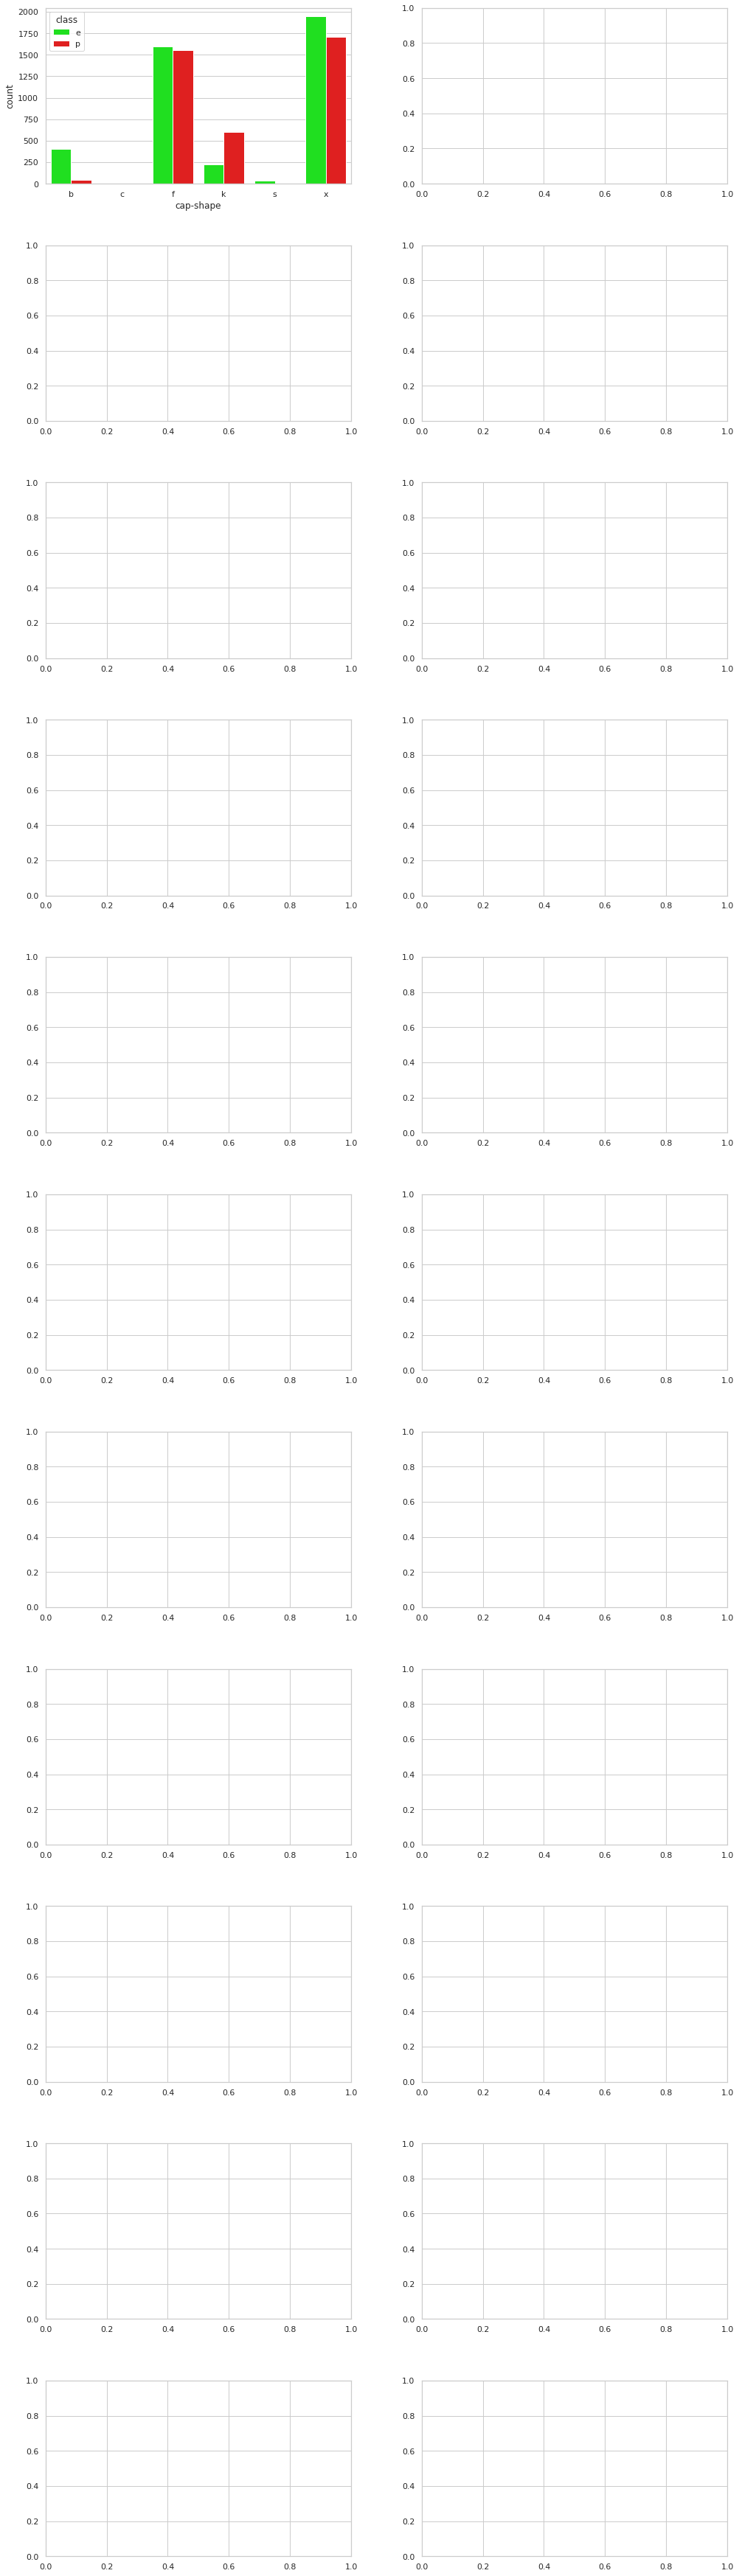

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
#print(math.ceil((mushroom_data.shape[1])//2))
fig, axis = plt.subplots(nrows= 11,ncols = 2,figsize=(15,50))
fig.tight_layout(pad=5.0)
idx=0
for column in mushroom_data.columns[1:]:
    ax = sns.countplot(data=mushroom_data, x=column, hue="class", ax = axis[idx//2][idx%2],palette=['#00FF00',"#FF0000"])
    for container in ax.containers:
        ax.bar_label(container)
    idx = idx + 1

In [ ]:
#Some general observations after analysing data in plot graphs :

#1. Sunken cap-shape mushroom is edible
#2. almond and anise in odor category are edible
#3. gray ub stalk-color-above-ring is edible
#4. gray ub stalk-color-below-ring is edible
#5. purple spore-print-color is edible
#6. abundant and numerous population are edible



In [ ]:
#Data Preprocessing and Transformation

#viel-type column is removed from the dataset

mushroom_data.drop(columns='veil-type', inplace=True)

#rows with ? in stalk-root removed

mushroom_data = mushroom_data[mushroom_data['stalk-root'] != '?']
#mushroom_data.info()

for column in mushroom_data.columns:
    mushroom_data = mushroom_data.apply(LabelEncoder().fit_transform)

In [ ]:
dfX = mushroom_data.loc[:, mushroom_data.columns!='class']
dfY = mushroom_data['class']
dfX.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,2,0,...,2,2,5,5,0,1,3,1,3,5
1,5,2,7,1,0,1,0,0,2,0,...,2,2,5,5,0,1,3,2,2,1
2,0,2,6,1,3,1,0,0,3,0,...,2,2,5,5,0,1,3,2,2,3
3,5,3,6,1,6,1,0,1,3,0,...,2,2,5,5,0,1,3,1,3,5
4,5,2,3,0,5,1,1,0,2,1,...,2,2,5,5,0,1,0,2,0,1


In [ ]:
#To train and test the whole data, we will use the kfold stragedy and split it into 10 equal parts


skf = KFold(n_splits=10, shuffle=True)

In [ ]:
accuracy_report = dict()
def trainwith(modelname):
    print(f'using model: {modelname} '.center(100,'='),'\n')
    idx = 0
    model_accurecy =[]
    for _train,_test in skf.split(dfX, dfY):
        idx += 1
        print(f'Fold Number {idx} '.center(100,'='), '\n')
        modelname.fit(dfX.iloc[_train],dfY.iloc[_train])
        print('Confusion Matrix'.center(70,'-'), '\n')
        ypred = modelname.predict(dfX.iloc[_test])
        print(confusion_matrix(dfY.iloc[_test],ypred), '\n')
        print('Classification Report'.center(70,'-'), '\n')
        print(classification_report(dfY.iloc[_test],ypred))
        model_accurecy.append(accuracy_score(dfY.iloc[_test],ypred))
    print('='*100)
    print('Avearage accuracy combined is  {:.02f}%'.format(np.array(model_accurecy).mean()*100))
    accuracy_report[modelname] = round(np.array(model_accurecy).mean()*100,2) 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
logReg = LogisticRegression(max_iter=1000)
trainwith(logReg)

==========================using model: LogisticRegression(max_iter=1000) =========================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[359   4]
 [ 11 191]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       363
           1       0.98      0.95      0.96       202

    accuracy                           0.97       565
   macro avg       0.97      0.97      0.97       565
weighted avg       0.97      0.97      0.97       565

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[328   8]
 [ 14 215]] 

------------------------Classification Report------------------------- 

              precisio

In [ ]:
svc_model = SVC()
trainwith(svc_model)

========================================using model: SVC() ========================================= 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[349   0]
 [  0 216]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       216

    accuracy                           1.00       565
   macro avg       1.00      1.00      1.00       565
weighted avg       1.00      1.00      1.00       565

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[363   0]
 [  2 200]] 

------------------------Classification Report------------------------- 

              precisio

In [ ]:
nlp_model = MLPClassifier()
trainwith(nlp_model)

===================================using model: MLPClassifier() ==================================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[365   0]
 [  0 200]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       365
           1       1.00      1.00      1.00       200

    accuracy                           1.00       565
   macro avg       1.00      1.00      1.00       565
weighted avg       1.00      1.00      1.00       565

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[364   0]
 [  0 201]] 

------------------------Classification Report------------------------- 

              precisio

In [ ]:
knn_model = KNeighborsClassifier()
trainwith(knn_model)

================================using model: KNeighborsClassifier() ================================ 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[332   0]
 [  0 233]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       233

    accuracy                           1.00       565
   macro avg       1.00      1.00      1.00       565
weighted avg       1.00      1.00      1.00       565

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[342   0]
 [  0 223]] 

------------------------Classification Report------------------------- 

              precisio

In [ ]:
rf_model = RandomForestClassifier()
trainwith(rf_model)

===============================using model: RandomForestClassifier() =============================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[359   0]
 [  0 206]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       206

    accuracy                           1.00       565
   macro avg       1.00      1.00      1.00       565
weighted avg       1.00      1.00      1.00       565

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[354   0]
 [  0 211]] 

------------------------Classification Report------------------------- 

              precisio

In [ ]:
clf = DecisionTreeClassifier()
trainwith(clf)

===============================using model: DecisionTreeClassifier() =============================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[367   0]
 [  0 198]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       198

    accuracy                           1.00       565
   macro avg       1.00      1.00      1.00       565
weighted avg       1.00      1.00      1.00       565

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[362   0]
 [  0 203]] 

------------------------Classification Report------------------------- 

              precisio

In [ ]:
accuracy_report

{LogisticRegression(max_iter=1000): 96.99,
 SVC(): 99.82,
 MLPClassifier(): 100.0,
 KNeighborsClassifier(): 100.0,
 RandomForestClassifier(): 100.0,
 DecisionTreeClassifier(): 100.0}